In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import seaborn as sns
import numpy as np
from networkx.algorithms import node_classification
from networkx.algorithms import community

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading datasets and importing data
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv("dataset/stack_network_nodes.csv")
df_edges = pd.read_csv("dataset/stack_network_links.csv")
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

In [4]:
#Nodes dataframe
df_nodes.head(10)

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14
5,ruby-on-rails,3,55.31
6,ios,4,87.46
7,swift,4,63.62
8,html5,6,140.18
9,c,1,189.83


In [5]:
# edges dataframe
df_edges.head(10)

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
5,linq,.net,20.501744
6,wcf,.net,28.074400
7,c#,.net,62.167895
8,tdd,agile,37.146590
9,codeigniter,ajax,23.191900


In [6]:
#general info of network
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


In [7]:
print("\nList of all {} nodes present\n{}".format(len(G.nodes()), G.nodes()))



List of all 115 nodes present
['html', 'css', 'hibernate', 'spring', 'ruby', 'ruby-on-rails', 'ios', 'swift', 'html5', 'c', 'c++', 'asp.net', 'c#', 'objective-c', 'javascript', 'jquery', 'redux', 'reactjs', 'php', 'mysql', 'spring-mvc', '.net', 'react-native', 'spring-boot', 'less', 'sass', 'hadoop', 'apache-spark', 'sql-server', 'express', 'node.js', 'mongodb', 'iphone', 'github', 'git', 'excel', 'excel-vba', 'entity-framework', 'linq', 'wcf', 'wpf', 'android', 'java', 'scala', 'ajax', 'django', 'python', 'vba', 'xcode', 'apache', 'nginx', 'angularjs', 'asp.net-web-api', 'laravel', 'plsql', 'oracle', 'json', 'xml', 'flask', 'wordpress', 'java-ee', 'maven', 'jsp', 'bash', 'linux', 'angular2', 'typescript', 'codeigniter', 'tdd', 'agile', 'twitter-bootstrap', 'web-services', 'rest', 'testing', 'selenium', 'android-studio', 'redis', 'jenkins', 'docker', 'amazon-web-services', 'angular', 'osx', 'machine-learning', 'qt', 'windows', 'ubuntu', 'ionic-framework', 'elasticsearch', 'vue.js', 'r

In [8]:
# check whether our network is connected or not connected
if nx.is_connected(G):
    print('Connected Graph')
else:
    print("Not connected")

Not connected


In [9]:
# Network Density
print("\nNetwork density:", nx.density(G))
# network density of 0.037376 says that it is not completely connected.
# May not all the nodes are connected


Network density: 0.03737604881769641


In [10]:
# diameter of largest component
components = nx.connected_components(G)
largest_component = max(components, key=len)
print(largest_component)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("\nNetwork diameter of largest component:", diameter)

{'django', 'xcode', 'wcf', 'matlab', 'web-services', 'drupal', 'mvc', 'html5', 'c', 'linux', 'angularjs', 'embedded', 'swift', 'visual-studio', 'unity3d', 'plsql', 'xamarin', 'sass', 'machine-learning', '.net', 'ubuntu', 'less', 'postgresql', 'photoshop', 'api', 'bootstrap', 'typescript', 'hibernate', 'express', 'objective-c', 'iphone', 'javascript', 'r', 'html', 'redux', 'mongodb', 'bash', 'node.js', 'ruby', 'go', 'codeigniter', 'devops', 'laravel', 'jquery', 'angular2', 'vb.net', 'spring-mvc', 'maven', 'twitter-bootstrap', 'python', 'c#', 'qt', 'c++', 'git', 'reactjs', 'jsp', 'amazon-web-services', 'java-ee', 'mysql', 'wpf', 'azure', 'redis', 'flask', 'ajax', 'asp.net', 'oracle', 'github', 'ios', 'json', 'entity-framework', 'spring-boot', 'ionic-framework', 'twitter-bootstrap-3', 'jenkins', 'php', 'linq', 'docker', 'eclipse', 'osx', 'css', 'cloud', 'android-studio', 'android', 'windows', 'nginx', 'vue.js', 'apache', 'wordpress', 'spring', 'angular', 'powershell', 'java', 'react-nativ

In [11]:
# Triadic closure(Local Clustering coefficient). This is one of the link prediction methods
triadic_closure = nx.transitivity(G)
print("\nTriadic closure:", triadic_closure)


Triadic closure: 0.48709239130434784


# Centrality

In [12]:
# Degree Centrality
# Top three nodes having the highest Degree Centrality
def find_nodes_with_highest_deg_cent(G):
    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:
            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:
            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:
            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1, maxnode2, maxnode3
top_deg_dc, top2_deg_dc, top3_deg_dc = find_nodes_with_highest_deg_cent(G)
print("\nTop three nodes having the highest degree centrality :", top_deg_dc, top2_deg_dc,
      top3_deg_dc)


Top three nodes having the highest degree centrality : {'jquery'} {'css', 'c#'} {'css', 'c#'}


# Degree Centrality

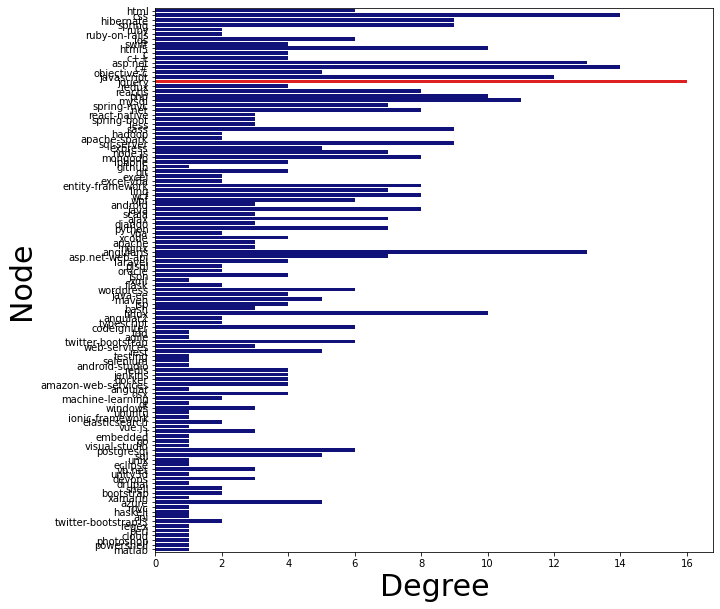

<Figure size 432x288 with 0 Axes>

In [13]:
from collections import Counter
degree_dic = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dic, 'degree')

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Nodes": list(degree_dic.keys())})
plt.figure(figsize=(10,10))
clrs = ['darkblue' if (x < max(degree_dic.values())) else 'red' for x in degree_dic.values() ]
sns.barplot(x = 'degree', y = 'Nodes', 
              data = degree_hist, 
              palette=clrs)
plt.ylabel('Node', fontsize=30)
plt.xlabel('Degree', fontsize=30)
plt.tick_params(axis='both', which='major',labelsize=10)

plt.show()
plt.savefig('nodedegree.png')
# clearly 'jquery' has highest degree

In [14]:
# degree of each node
degree=G.degree(G.nodes())
for i in degree:
    print(i,end=" ")

('html', 6) ('css', 14) ('hibernate', 9) ('spring', 9) ('ruby', 2) ('ruby-on-rails', 2) ('ios', 6) ('swift', 4) ('html5', 10) ('c', 4) ('c++', 4) ('asp.net', 13) ('c#', 14) ('objective-c', 5) ('javascript', 12) ('jquery', 16) ('redux', 4) ('reactjs', 8) ('php', 10) ('mysql', 11) ('spring-mvc', 7) ('.net', 8) ('react-native', 3) ('spring-boot', 3) ('less', 3) ('sass', 9) ('hadoop', 2) ('apache-spark', 2) ('sql-server', 9) ('express', 5) ('node.js', 7) ('mongodb', 8) ('iphone', 4) ('github', 1) ('git', 4) ('excel', 2) ('excel-vba', 2) ('entity-framework', 8) ('linq', 7) ('wcf', 8) ('wpf', 6) ('android', 3) ('java', 8) ('scala', 3) ('ajax', 7) ('django', 3) ('python', 7) ('vba', 2) ('xcode', 4) ('apache', 3) ('nginx', 3) ('angularjs', 13) ('asp.net-web-api', 7) ('laravel', 4) ('plsql', 2) ('oracle', 2) ('json', 4) ('xml', 1) ('flask', 2) ('wordpress', 6) ('java-ee', 4) ('maven', 5) ('jsp', 4) ('bash', 3) ('linux', 10) ('angular2', 2) ('typescript', 2) ('codeigniter', 6) ('tdd', 1) ('agile

In [15]:
# Degree centrality
dc_dict = nx.degree_centrality(G)
nx.set_node_attributes(G, dc_dict, 'degree')
sorted_dc = sorted(dc_dict.items(), key=itemgetter(1), reverse=True)
print("Order of nodes According to their importance by using Degree centrality")
for i in sorted_dc:
    print(i)

Order of nodes According to their importance by using Degree centrality
('jquery', 0.14035087719298245)
('css', 0.12280701754385964)
('c#', 0.12280701754385964)
('asp.net', 0.11403508771929824)
('angularjs', 0.11403508771929824)
('javascript', 0.10526315789473684)
('mysql', 0.09649122807017543)
('html5', 0.08771929824561403)
('php', 0.08771929824561403)
('linux', 0.08771929824561403)
('hibernate', 0.07894736842105263)
('spring', 0.07894736842105263)
('sass', 0.07894736842105263)
('sql-server', 0.07894736842105263)
('reactjs', 0.07017543859649122)
('.net', 0.07017543859649122)
('mongodb', 0.07017543859649122)
('entity-framework', 0.07017543859649122)
('wcf', 0.07017543859649122)
('java', 0.07017543859649122)
('spring-mvc', 0.06140350877192982)
('node.js', 0.06140350877192982)
('linq', 0.06140350877192982)
('ajax', 0.06140350877192982)
('python', 0.06140350877192982)
('asp.net-web-api', 0.06140350877192982)
('html', 0.05263157894736842)
('ios', 0.05263157894736842)
('wpf', 0.052631578947

In [16]:
# TOp 3 nodes with highest Degree centrality
print("\nTop three nodes having highest Degree centrality")
for i in sorted_dc[:3]:
    print(i)


Top three nodes having highest Degree centrality
('jquery', 0.14035087719298245)
('css', 0.12280701754385964)
('c#', 0.12280701754385964)


# Eigenvector Centrality

In [17]:
# Eigenvector Centrality
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Order of nodes According to their importance by using EigenVector Centrality")
for i in sorted_eigenvector:
    print(i)

Order of nodes According to their importance by using EigenVector Centrality
('jquery', 0.3657638453622554)
('css', 0.338701180241117)
('javascript', 0.32563098638889276)
('html5', 0.2681052746250041)
('php', 0.26530101525817973)
('angularjs', 0.2652026528173442)
('sass', 0.2520957761852705)
('mysql', 0.239342658253863)
('twitter-bootstrap', 0.20709455337131874)
('html', 0.2038246927757326)
('ajax', 0.19962166194538747)
('wordpress', 0.16028159729147778)
('codeigniter', 0.14895861770584937)
('reactjs', 0.13770631051407162)
('asp.net', 0.1133542478710743)
('node.js', 0.11189410352446867)
('mongodb', 0.1032689802929971)
('less', 0.09797510969685971)
('bootstrap', 0.08035855855730212)
('asp.net-web-api', 0.07857086259618636)
('c#', 0.07728807819558778)
('laravel', 0.0755393996423041)
('express', 0.07516052680941876)
('twitter-bootstrap-3', 0.07230568206070488)
('json', 0.06629110836596808)
('sql-server', 0.06557121653546155)
('entity-framework', 0.06459773471227317)
('wcf', 0.064597734712

In [18]:
# Top 3 nodes with highest Eigenvector centrality
print("\nTop three nodes having highest Eigenvector centrality")
for i in sorted_eigenvector[:3]:
    print(i)


Top three nodes having highest Eigenvector centrality
('jquery', 0.3657638453622554)
('css', 0.338701180241117)
('javascript', 0.32563098638889276)


# Betweenness Centrality

In [19]:
# Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Order of nodes According to their importance by using Betweenness Centrality")
for i in sorted_betweenness:
    print(i)

Order of nodes According to their importance by using Betweenness Centrality
('jquery', 0.2555399753457234)
('linux', 0.20840160874161803)
('mysql', 0.1976931477327379)
('asp.net', 0.17406690608353667)
('apache', 0.13087186063431988)
('json', 0.12319763505138448)
('angularjs', 0.12286762799187795)
('rest', 0.11370118004957315)
('python', 0.11018306022497917)
('postgresql', 0.08761830339613291)
('java', 0.07601405167311084)
('mongodb', 0.06737252741910403)
('osx', 0.06635551651853466)
('jenkins', 0.05981851611101727)
('django', 0.05779082240190766)
('amazon-web-services', 0.056437373973470865)
('c#', 0.055756579881898374)
('azure', 0.05400019656985602)
('asp.net-web-api', 0.053419633104008046)
('hibernate', 0.053043904033657156)
('spring', 0.053043904033657156)
('git', 0.05177577481257034)
('css', 0.04133537048548417)
('maven', 0.0396335043796618)
('ios', 0.038487173093600655)
('android', 0.031330538736221075)
('docker', 0.03081403967524135)
('angular2', 0.030740568234746156)
('sql', 0.

In [20]:
# Top 3 nodes with highest Betweenness centrality
print("\nTop three nodes having highest Betweenness centrality")
for b in sorted_betweenness[:3]:
    print(b)


Top three nodes having highest Betweenness centrality
('jquery', 0.2555399753457234)
('linux', 0.20840160874161803)
('mysql', 0.1976931477327379)


In [21]:
# shortest path between nodes
nx.shortest_path(G,'jquery','c#')

['jquery', 'asp.net', 'c#']

In [22]:
nx.shortest_path(G,'jquery','redux')

['jquery', 'angularjs', 'express', 'redux']

In [23]:
nx.shortest_path(G,'linq','xml')

['linq', 'asp.net', 'jquery', 'json', 'xml']

In [24]:
# from all the 3 centralities common node is 'jquery'
# since it is not connected
# shortest path lengths from highest centrality node 'jquery' are
shortlength_jquery=nx.shortest_path_length(G,'jquery')
shortlength_jquery

{'jquery': 0,
 'asp.net': 1,
 'html5': 1,
 'php': 1,
 'wordpress': 1,
 'css': 1,
 'javascript': 1,
 'json': 1,
 'angularjs': 1,
 'sass': 1,
 'twitter-bootstrap': 1,
 'bootstrap': 1,
 'codeigniter': 1,
 'html': 1,
 'mysql': 1,
 'twitter-bootstrap-3': 1,
 'ajax': 1,
 'wpf': 2,
 'express': 2,
 'wcf': 2,
 'azure': 2,
 'drupal': 2,
 'mongodb': 2,
 'mvc': 2,
 'node.js': 2,
 'laravel': 2,
 'apache': 2,
 'angular2': 2,
 'vb.net': 2,
 'entity-framework': 2,
 'rest': 2,
 'ionic-framework': 2,
 'c#': 2,
 '.net': 2,
 'xml': 2,
 'linq': 2,
 'less': 2,
 'reactjs': 2,
 'postgresql': 2,
 'photoshop': 2,
 'sql-server': 2,
 'asp.net-web-api': 2,
 'sql': 2,
 'django': 3,
 'redis': 3,
 'web-services': 3,
 'redux': 3,
 'linux': 3,
 'oracle': 3,
 'ruby': 3,
 'nginx': 3,
 'vue.js': 3,
 'visual-studio': 3,
 'unity3d': 3,
 'spring': 3,
 'xamarin': 3,
 'plsql': 3,
 'react-native': 3,
 'elasticsearch': 3,
 'api': 3,
 'typescript': 3,
 'amazon-web-services': 3,
 'hibernate': 3,
 'ruby-on-rails': 3,
 'osx': 4,
 'f

# Building a subgroup
- We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function bfs_tree to do it.

In [25]:
sub1 = nx.bfs_tree(G,'jquery')

In [26]:
sub2 = nx.bfs_tree(G,'css')

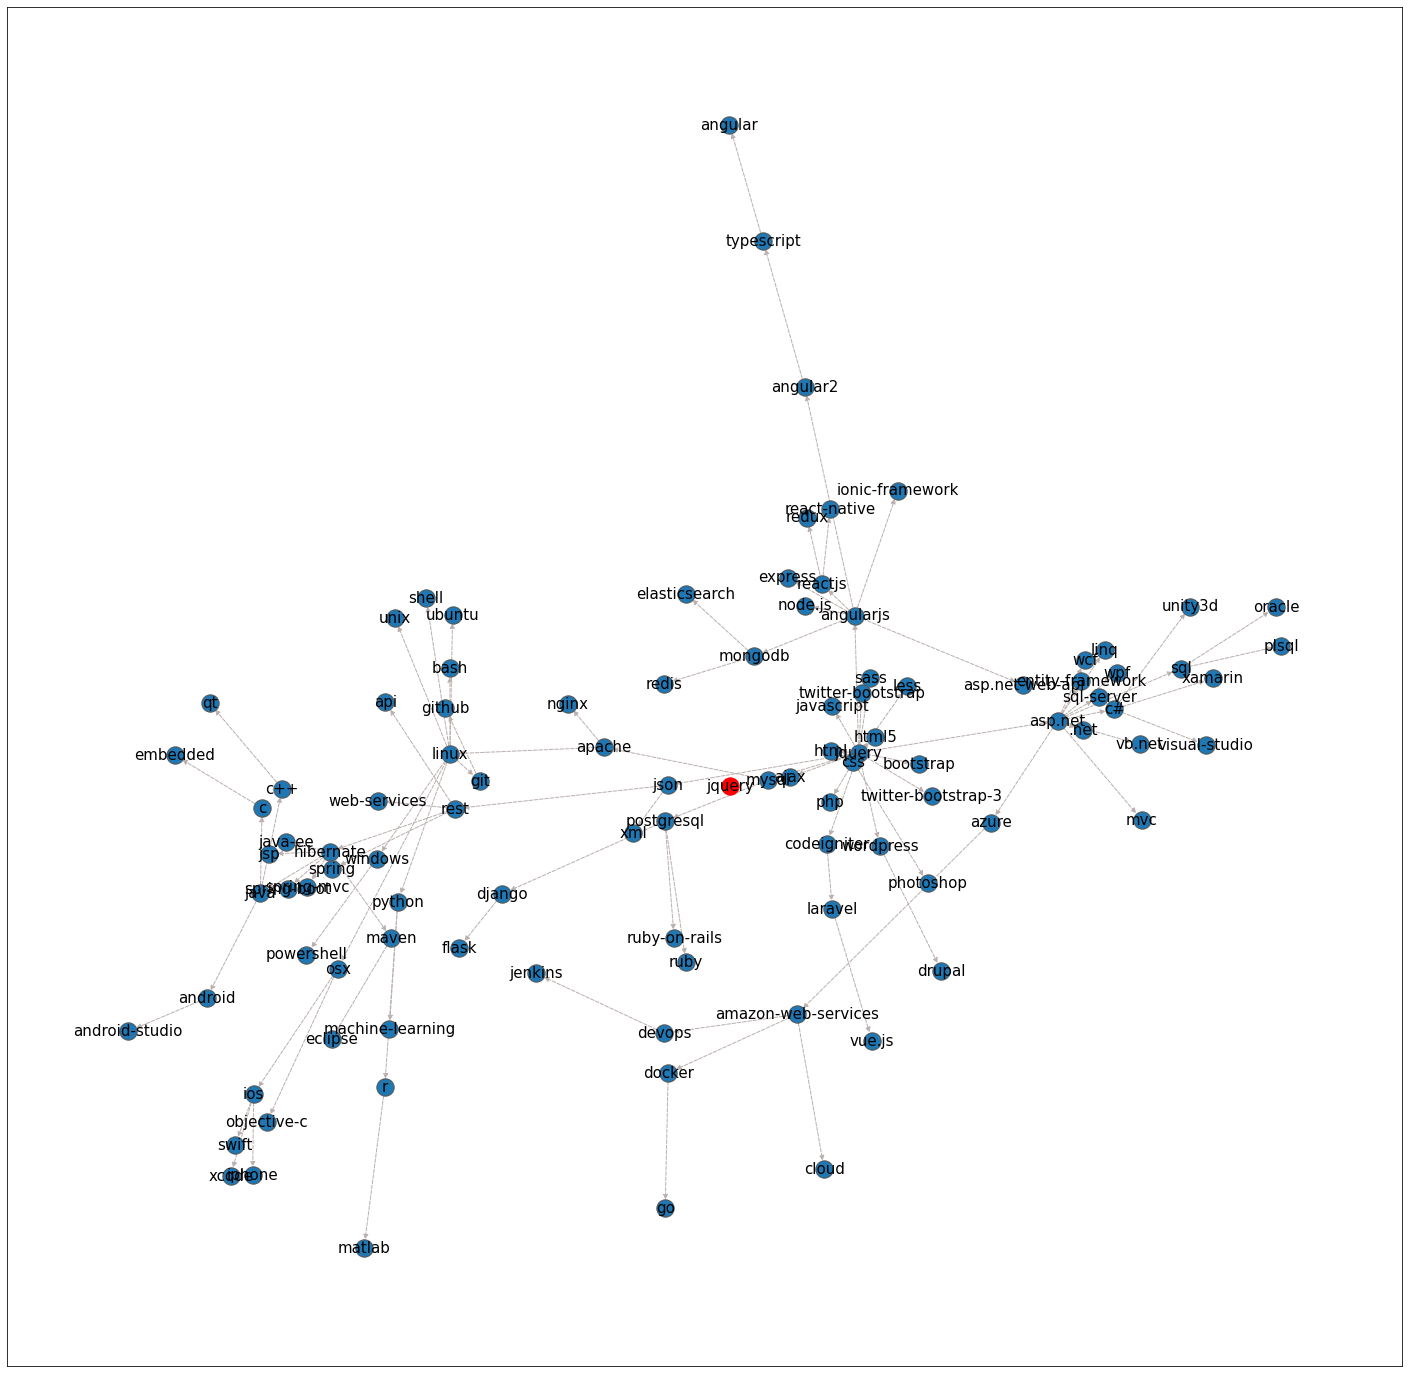

In [27]:
# Subgroup (an oriented tree constructed from of a breadth-first-search starting at "jquery")
plt.figure(figsize=(25, 25))
options = {
    'edge_color': '#BAB0AD',
    'width': 1,
    'with_labels': True,
    'font_weight': 'normal',
    'font_size': 15,
    'style': 'dashed'
}
sizes = [G.nodes[node]['nodesize'] * 10 for node in G]
nx.draw_networkx(sub1, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
nx.draw_networkx(sub1.subgraph('jquery'), pos=nx.spring_layout(G, k=0.25, iterations=50),node_color='red', **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()

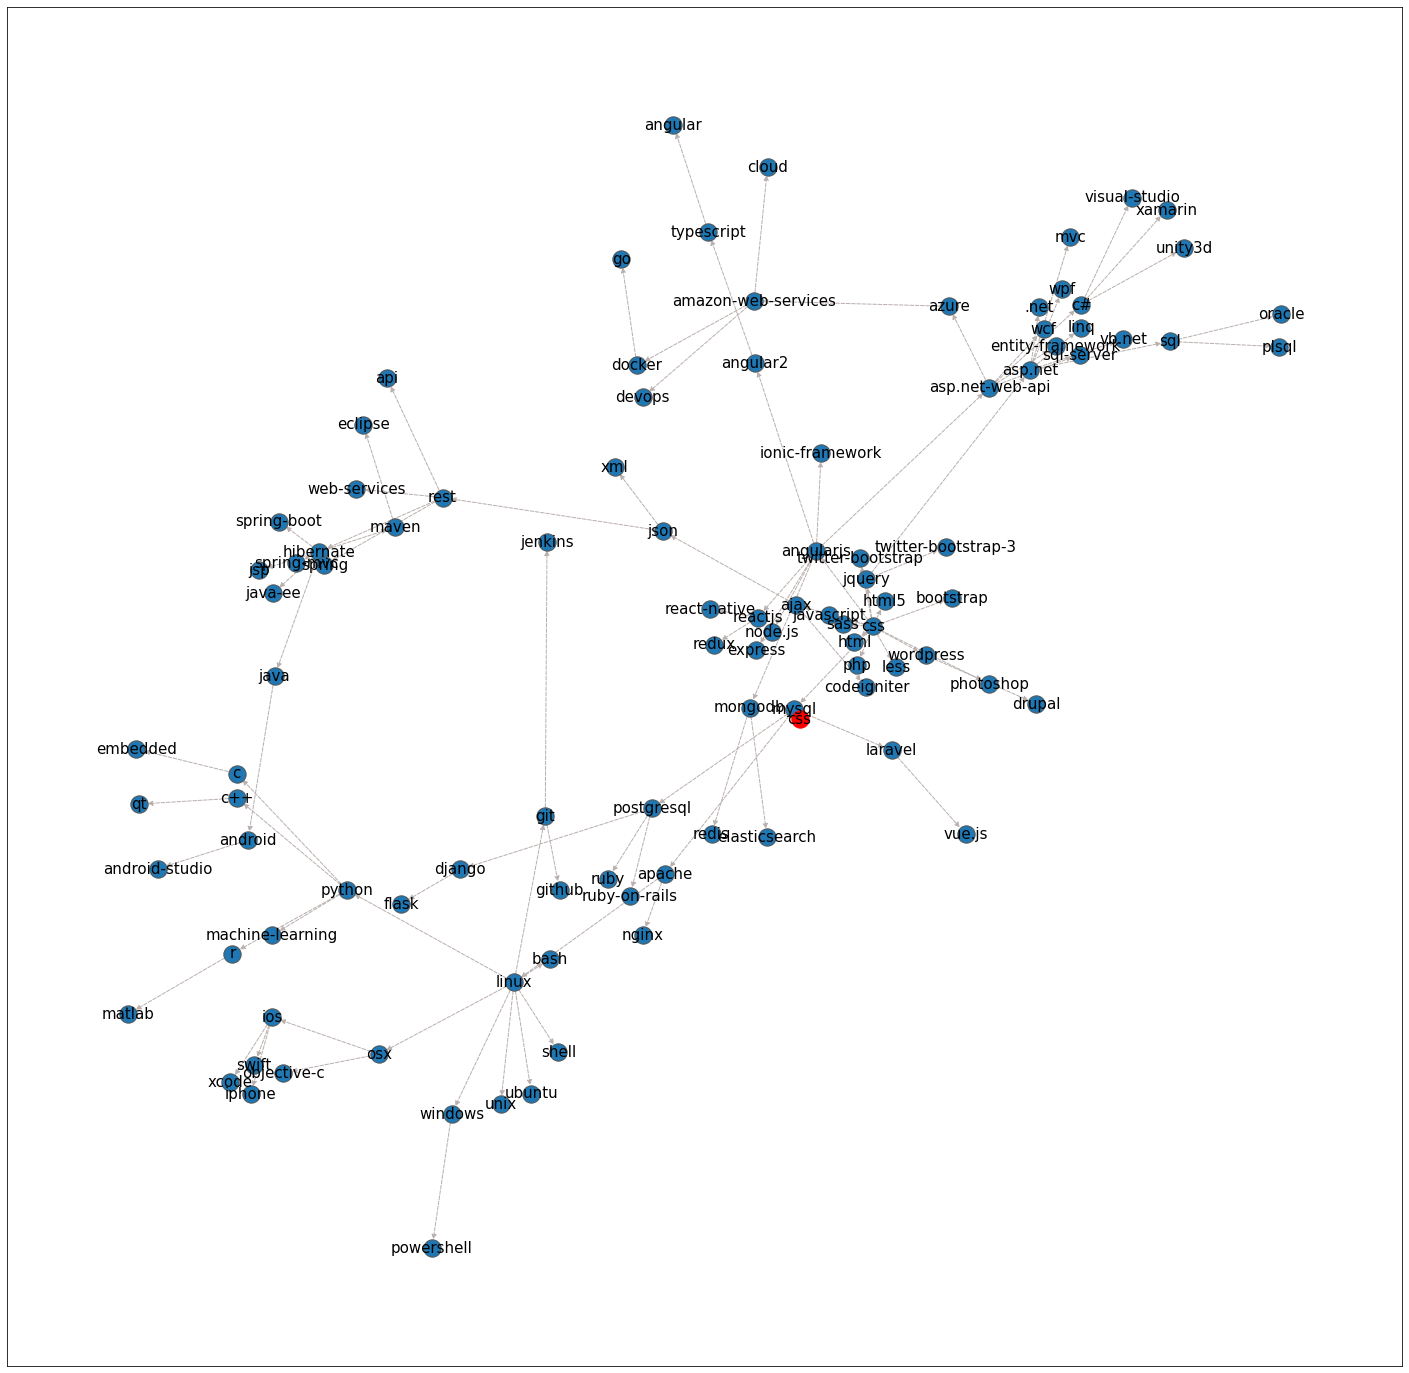

In [28]:
# Subgroup (an oriented tree constructed from of a breadth-first-search starting at "css")
plt.figure(figsize=(25, 25))
options = {
    'edge_color': '#BAB0AD',
    'width': 1,
    'with_labels': True,
    'font_weight': 'normal',
    'font_size': 15,
    'style': 'dashed'
}
sizes = [G.nodes[node]['nodesize'] * 10 for node in G]
nx.draw_networkx(sub2, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
nx.draw_networkx(sub2.subgraph('css'), pos=nx.spring_layout(G, k=0.25, iterations=50),node_color='red', **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()

In [29]:
# Nodes which are connected to important node
print(nx.node_connected_component(G,'jquery'))
print("\nTotal {} nodes are connected with main important 'jquery' node".format(len(nx.node_connected_component(G,'jquery'))))

{'django', 'xcode', 'wcf', 'matlab', 'web-services', 'drupal', 'mvc', 'html5', 'c', 'linux', 'angularjs', 'embedded', 'swift', 'visual-studio', 'unity3d', 'plsql', 'xamarin', 'sass', 'machine-learning', '.net', 'ubuntu', 'less', 'postgresql', 'photoshop', 'api', 'bootstrap', 'typescript', 'hibernate', 'express', 'objective-c', 'iphone', 'javascript', 'r', 'html', 'redux', 'mongodb', 'bash', 'node.js', 'ruby', 'go', 'codeigniter', 'devops', 'laravel', 'jquery', 'angular2', 'vb.net', 'spring-mvc', 'maven', 'twitter-bootstrap', 'python', 'c#', 'qt', 'c++', 'git', 'reactjs', 'jsp', 'amazon-web-services', 'java-ee', 'mysql', 'wpf', 'azure', 'redis', 'flask', 'ajax', 'asp.net', 'oracle', 'github', 'ios', 'json', 'entity-framework', 'spring-boot', 'ionic-framework', 'twitter-bootstrap-3', 'jenkins', 'php', 'linq', 'docker', 'eclipse', 'osx', 'css', 'cloud', 'android-studio', 'android', 'windows', 'nginx', 'vue.js', 'apache', 'wordpress', 'spring', 'angular', 'java', 'powershell', 'react-nativ

In [30]:
# Nodes which are not connected to important node
print(G.nodes()-list(nx.node_connected_component(G,'jquery')))

{'scala', 'agile', 'regex', 'excel', 'testing', 'selenium', 'haskell', 'excel-vba', 'perl', 'apache-spark', 'hadoop', 'vba', 'tdd'}


# Node Classification

In [31]:
# harmonic_function
G.nodes['angular']['label']='web API framework'
G.nodes['css']['label']='web design '
G.nodes['c++']['label']='programming language'
G.nodes['git']['label']='command shell'
G.nodes['linux']['label']='OS'
G.nodes['qt']['label']='GUI'
G.nodes['hibernate']['label']='database'
classs = node_classification.harmonic_function(G)
nodes=list(G.nodes())
node_class={nodes[i]:classs[i] for i in range(len(nodes))}
for i in node_class:
    print(i,"-------->",node_class.get(i))

html --------> web design 
css --------> web design 
hibernate --------> database
spring --------> database
ruby --------> web design 
ruby-on-rails --------> web design 
ios --------> OS
swift --------> OS
html5 --------> web design 
c --------> programming language
c++ --------> programming language
asp.net --------> web design 
c# --------> web design 
objective-c --------> OS
javascript --------> web design 
jquery --------> web design 
redux --------> web design 
reactjs --------> web design 
php --------> web design 
mysql --------> web design 
spring-mvc --------> database
.net --------> web design 
react-native --------> web design 
spring-boot --------> database
less --------> web design 
sass --------> web design 
hadoop --------> web design 
apache-spark --------> web design 
sql-server --------> web design 
express --------> web design 
node.js --------> web design 
mongodb --------> web design 
iphone --------> OS
github --------> command shell
git --------> command shell


# Link prediction
- Jaccard Coefficient

In [32]:
# jaccard coefficient
threshold_j=0.45
jaccard=list(nx.jaccard_coefficient(G))
for i in jaccard:
    if i[2]>threshold_j:
        print(i)

('matlab', 'machine-learning', 0.5)
('web-services', 'spring-boot', 0.5)
('apache-spark', 'haskell', 0.5)
('html5', 'html', 0.45454545454545453)
('visual-studio', 'unity3d', 1.0)
('visual-studio', 'xamarin', 1.0)
('unity3d', 'xamarin', 1.0)
('.net', 'asp.net-web-api', 0.6666666666666666)
('ubuntu', 'shell', 0.5)
('ubuntu', 'unix', 1.0)
('less', 'twitter-bootstrap', 0.5)
('photoshop', 'bootstrap', 0.5)
('hadoop', 'haskell', 0.5)
('express', 'react-native', 0.6)
('html', 'ajax', 0.625)
('html', 'twitter-bootstrap', 0.5)
('angular2', 'ionic-framework', 0.5)
('angular2', 'angular', 0.5)
('vb.net', 'sql', 0.6)
('maven', 'spring-boot', 0.6)
('maven', 'jsp', 0.5)
('maven', 'java-ee', 0.5)
('git', 'shell', 0.5)
('jsp', 'spring-boot', 0.75)
('jsp', 'java-ee', 1.0)
('java-ee', 'spring-boot', 0.75)
('wpf', 'sql-server', 0.6666666666666666)
('linq', 'asp.net-web-api', 0.5555555555555556)
('shell', 'unix', 0.5)


- Resource Allocation Index
(predict missing links, similarity between two nodes)

In [33]:
# Resource Allocation Index
threshold_RAI=0.45
RAI=list(nx.resource_allocation_index(G))
for i in RAI:
    if i[2]>threshold_RAI:
        print(i)

('angularjs', 'typescript', 0.5)
('angularjs', 'redux', 0.46785714285714286)
('sass', 'php', 0.48392857142857143)
('.net', 'asp.net-web-api', 0.7094627594627594)
('express', 'react-native', 0.5178571428571428)
('redux', 'mongodb', 0.46785714285714286)
('codeigniter', 'css', 0.5629329004329003)
('angular2', 'angular', 0.5)
('python', 'java', 0.5)
('jsp', 'java-ee', 0.49007936507936506)
('amazon-web-services', 'jenkins', 0.5833333333333333)
('wpf', 'sql-server', 0.6662087912087913)
('linq', 'asp.net-web-api', 0.5094627594627594)


- Adamic Adar Index  
1. predict missing links in a Network, according to the amount of shared links between two nodes

In [34]:
# Adamic adar Index
threshold_AAI=1.45
AAI=list(nx.adamic_adar_index(G))
for i in AAI:
    if i[2]>threshold_AAI:
        print(i)

('wcf', 'azure', 1.76359111627397)
('html5', 'ajax', 1.5763210281972886)
('html5', 'html', 2.031440641510707)
('html5', 'mysql', 1.5763210281972886)
('angularjs', 'php', 1.5763210281972884)
('angularjs', 'html', 1.5971461596074552)
('angularjs', 'redux', 1.6161316238923504)
('angularjs', 'mysql', 1.6229248932570246)
('sass', 'php', 2.1344316547485356)
('sass', 'mysql', 1.700137172845284)
('.net', 'asp.net-web-api', 2.807045668740238)
('express', 'react-native', 1.7161442097772202)
('javascript', 'mongodb', 1.8017003260082651)
('javascript', 'codeigniter', 1.7258989759194896)
('javascript', 'wordpress', 1.6081859057186956)
('html', 'ajax', 1.9933534196215348)
('html', 'twitter-bootstrap', 1.5971461596074557)
('redux', 'mongodb', 1.6161316238923504)
('codeigniter', 'css', 2.2840096024707366)
('twitter-bootstrap', 'php', 1.5763210281972886)
('jsp', 'java-ee', 1.905035915959576)
('amazon-web-services', 'jenkins', 1.631586747071319)
('mysql', 'wordpress', 1.732002050366691)
('wpf', 'sql-ser

- Preferential Attachment 
1. The probability of generating a new link of node u is directly proportional to the degree of the node

In [35]:
#preferential Attachment
degree_dic = dict(G.degree(G.nodes()))
minn=min(degree_dic.values())
maxx=max(degree_dic.values())
avg=sum(degree_dic.values())/len(degree_dic)
print("Minimum degree = {}\nMaximum degree={}\nAverage Degree={}".format(minn,maxx,avg))

Minimum degree = 1
Maximum degree=16
Average Degree=4.260869565217392


In [36]:
thres_d=maxx*avg
PA=list(nx.preferential_attachment(G))
for i in PA:
    if i[2]>thres_d:
        print(i)

('wcf', 'html5', 80)
('wcf', 'linux', 80)
('wcf', 'angularjs', 104)
('wcf', 'sass', 72)
('wcf', 'php', 80)
('wcf', 'hibernate', 72)
('wcf', 'javascript', 96)
('wcf', 'css', 112)
('wcf', 'jquery', 128)
('wcf', 'spring', 72)
('wcf', 'mysql', 88)
('html5', 'ajax', 70)
('html5', 'asp.net', 130)
('html5', 'linux', 100)
('html5', 'entity-framework', 80)
('html5', '.net', 80)
('html5', 'linq', 70)
('html5', 'hibernate', 90)
('html5', 'mongodb', 80)
('html5', 'node.js', 70)
('html5', 'spring', 90)
('html5', 'spring-mvc', 70)
('html5', 'java', 80)
('html5', 'python', 70)
('html5', 'c#', 140)
('html5', 'reactjs', 80)
('html5', 'sql-server', 90)
('html5', 'asp.net-web-api', 70)
('html5', 'mysql', 110)
('linux', 'ajax', 70)
('linux', 'asp.net', 130)
('linux', 'angularjs', 130)
('linux', 'entity-framework', 80)
('linux', 'sass', 90)
('linux', '.net', 80)
('linux', 'php', 100)
('linux', 'linq', 70)
('linux', 'hibernate', 90)
('linux', 'javascript', 120)
('linux', 'css', 140)
('linux', 'mongodb', 80)

# Community Detection

- Greedy Modularity Community

In [37]:
# Greedy Modularity
communities = community.greedy_modularity_communities(G)
for i in communities:
    print(i,"\n")

frozenset({'django', 'xcode', 'wcf', 'matlab', 'web-services', 'drupal', 'c', 'html5', 'mvc', 'linux', 'angularjs', 'embedded', 'swift', 'visual-studio', 'unity3d', 'plsql', 'xamarin', 'sass', 'machine-learning', '.net', 'ubuntu', 'less', 'postgresql', 'photoshop', 'api', 'bootstrap', 'typescript', 'hibernate', 'objective-c', 'express', 'iphone', 'javascript', 'r', 'html', 'redux', 'mongodb', 'bash', 'node.js', 'ruby', 'go', 'codeigniter', 'devops', 'laravel', 'jquery', 'angular2', 'vb.net', 'spring-mvc', 'maven', 'twitter-bootstrap', 'python', 'c#', 'qt', 'c++', 'git', 'reactjs', 'jsp', 'amazon-web-services', 'java-ee', 'mysql', 'wpf', 'azure', 'redis', 'flask', 'ajax', 'asp.net', 'oracle', 'github', 'ios', 'entity-framework', 'spring-boot', 'json', 'ionic-framework', 'jenkins', 'twitter-bootstrap-3', 'php', 'linq', 'docker', 'eclipse', 'osx', 'css', 'cloud', 'android-studio', 'android', 'windows', 'nginx', 'vue.js', 'apache', 'wordpress', 'spring', 'angular', 'java', 'powershell', 'r

In [38]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [39]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: jquery | Eigenvector Centrality: 0.3657638453622554
Name: css | Eigenvector Centrality: 0.338701180241117
Name: javascript | Eigenvector Centrality: 0.32563098638889276
Name: html5 | Eigenvector Centrality: 0.2681052746250041
Name: php | Eigenvector Centrality: 0.26530101525817973


In [40]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c),"\n") # Print out the classes and their members

Class 0: ['django', 'xcode', 'wcf', 'matlab', 'web-services', 'drupal', 'c', 'html5', 'mvc', 'linux', 'angularjs', 'embedded', 'swift', 'visual-studio', 'unity3d', 'plsql', 'xamarin', 'sass', 'machine-learning', '.net', 'ubuntu', 'less', 'postgresql', 'photoshop', 'api', 'bootstrap', 'typescript', 'hibernate', 'objective-c', 'express', 'iphone', 'javascript', 'r', 'html', 'redux', 'mongodb', 'bash', 'node.js', 'ruby', 'go', 'codeigniter', 'devops', 'laravel', 'jquery', 'angular2', 'vb.net', 'spring-mvc', 'maven', 'twitter-bootstrap', 'python', 'c#', 'qt', 'c++', 'git', 'reactjs', 'jsp', 'amazon-web-services', 'java-ee', 'mysql', 'wpf', 'azure', 'redis', 'flask', 'ajax', 'asp.net', 'oracle', 'github', 'ios', 'entity-framework', 'spring-boot', 'json', 'ionic-framework', 'jenkins', 'twitter-bootstrap-3', 'php', 'linq', 'docker', 'eclipse', 'osx', 'css', 'cloud', 'android-studio', 'android', 'windows', 'nginx', 'vue.js', 'apache', 'wordpress', 'spring', 'angular', 'java', 'powershell', 're

- label_propagation_communities

In [41]:
# Label Propagation communities
label_prop_comm=community.label_propagation_communities(G)
j=0
for i in label_prop_comm:
    print("Class [{}] ----> {}".format(j,i))
    j+=1

Class [0] ----> {'c++', 'qt'}
Class [1] ----> {'android', 'android-studio'}
Class [2] ----> {'python', 'flask', 'django'}
Class [3] ----> {'vba', 'excel', 'excel-vba'}
Class [4] ----> {'express', 'reactjs', 'node.js', 'react-native', 'redux', 'mongodb'}
Class [5] ----> {'angular2', 'angular', 'typescript'}
Class [6] ----> {'agile', 'tdd'}
Class [7] ----> {'eclipse', 'spring', 'jsp', 'spring-boot', 'spring-mvc', 'java', 'maven', 'rest', 'api', 'hibernate', 'web-services', 'java-ee'}
Class [8] ----> {'selenium', 'testing'}
Class [9] ----> {'postgresql', 'ruby', 'redis', 'elasticsearch', 'ruby-on-rails'}
Class [10] ----> {'ios', 'xcode', 'objective-c', 'osx', 'iphone', 'swift'}
Class [11] ----> {'powershell', 'windows'}
Class [12] ----> {'c', 'embedded'}
Class [13] ----> {'plsql', 'oracle'}
Class [14] ----> {'docker', 'go', 'cloud', 'amazon-web-services', 'devops', 'jenkins'}
Class [15] ----> {'ubuntu', 'bash', 'git', 'linux', 'nginx', 'unix', 'github', 'shell', 'apache'}
Class [16] ---->

# Drawing Networks

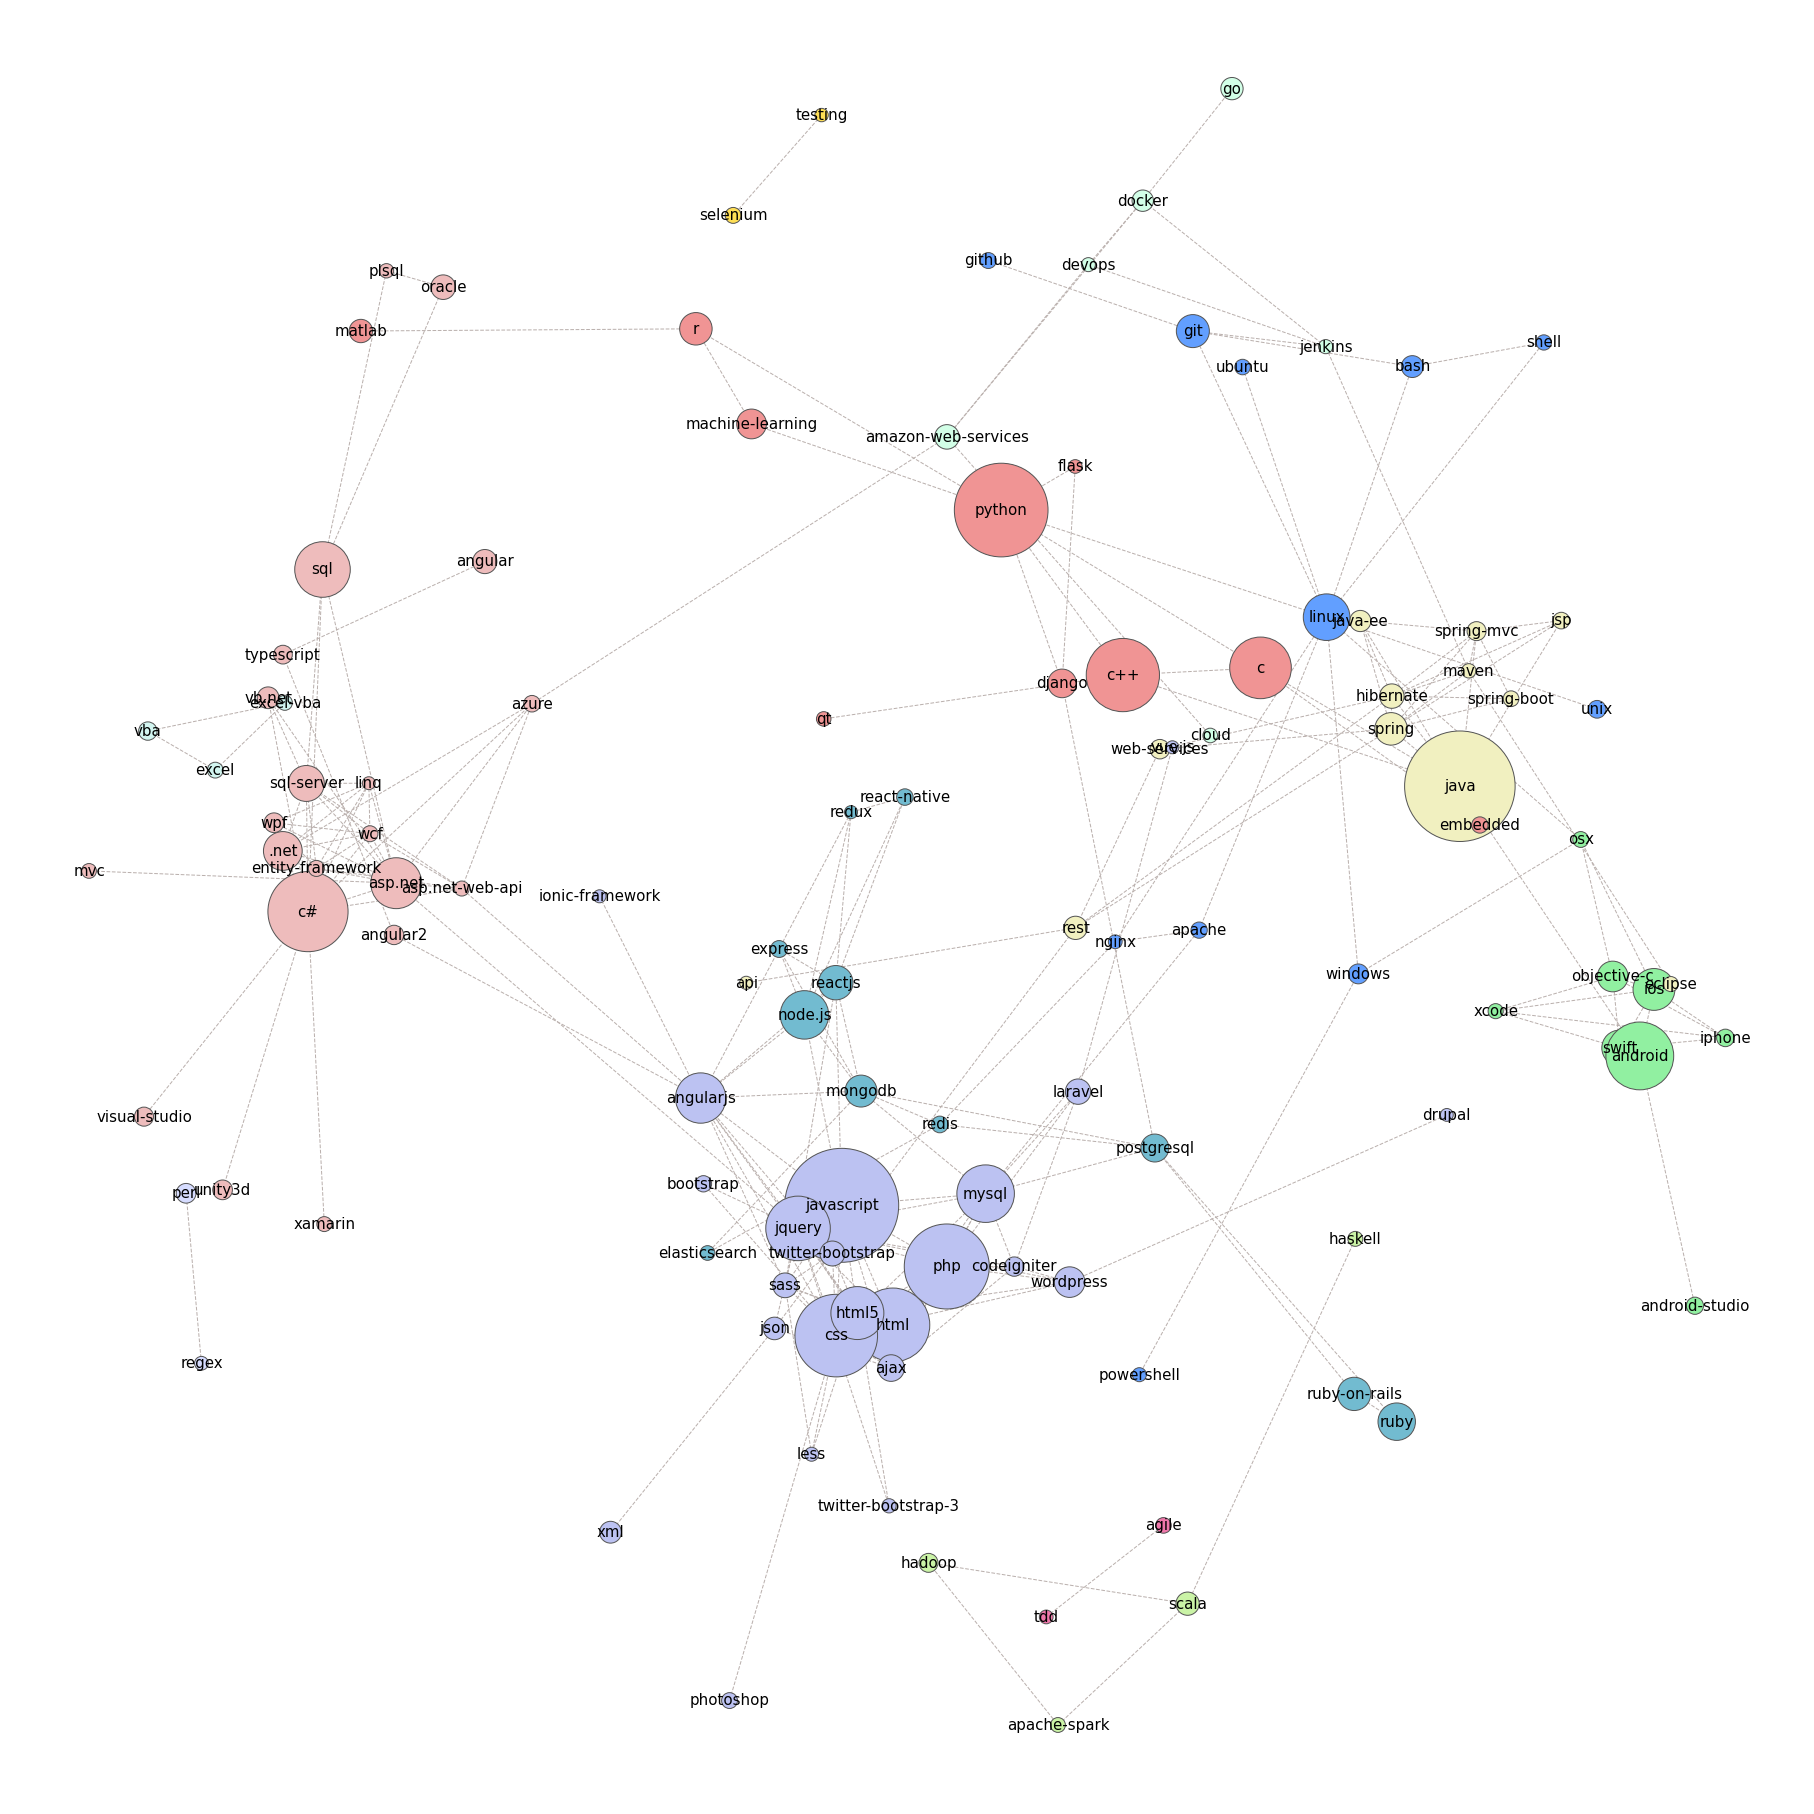

<Figure size 432x288 with 0 Axes>

In [42]:
color_map = {1: '#f09494', 2: '#eebcbc', 3: '#72bbd0', 4: '#91f0a1', 5: '#629fff', 6: '#bcc2f2',
             7: '#eebcbc', 8: '#f1f0c0', 9: '#d2ffe7', 10: '#caf3a6', 11: '#ffdf55', 12: '#ef77aa',
             13: '#d6dcff', 14: '#d2f5f0', 15: '#2B2B40', 16: '#e6bbaa', 17: '#c158fd'}

plt.figure(figsize=(25, 25))
options = {
    'edge_color': '#BAB0AD',
    'width': 1,
    'with_labels': True,
    'font_weight': 'normal',
    'font_size': 15,
    'style': 'dashed'
}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize'] * 20 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""

# nx.spring_layout(G, k=0.25, iterations=50)
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=1, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()
plt.savefig("Network.png")